In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist






2023-08-18 15:20:38.390609: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()


model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [3]:
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [4]:
model.summary()

history = model.fit(X_train_full, y_train_full, epochs=5, batch_size=128)


model.evaluate(X_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2682 - accuracy: 0.9232
Epoch 2/5
469/469 [==============================] - 3s 5ms/step - loss: 0.1086 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0722 - accu

[0.07311274111270905, 0.978600025177002]

<function matplotlib.pyplot.show(close=None, block=None)>

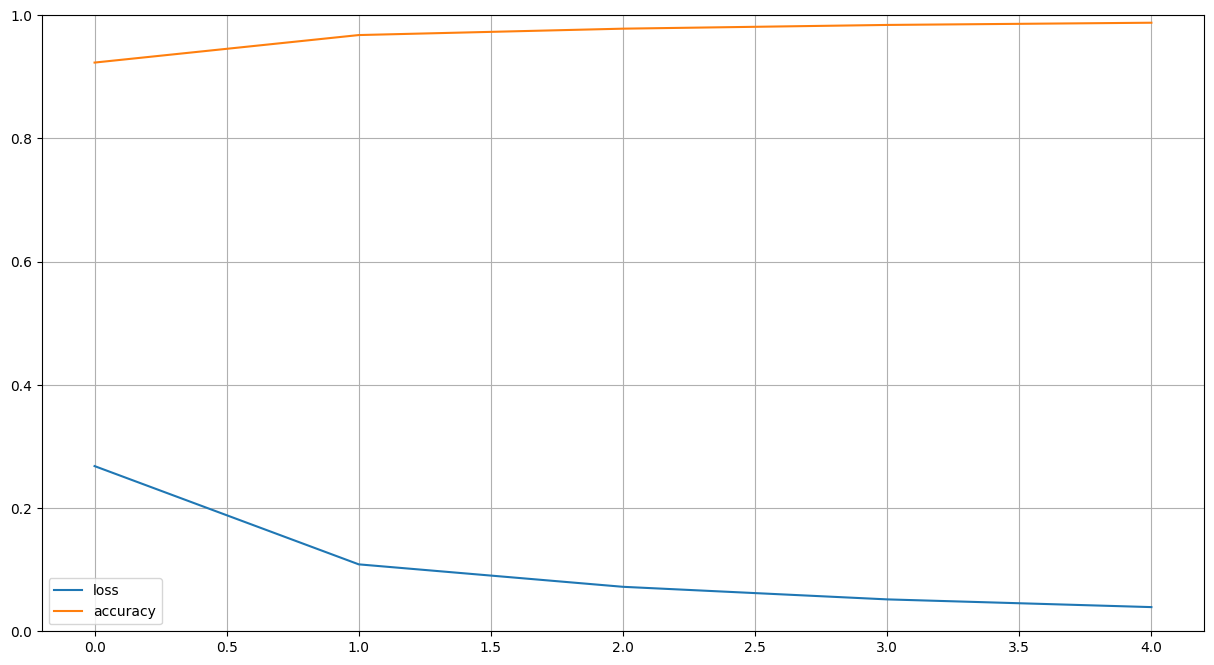

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [6]:
import pandas